<center><h1>Pruevitas Abel</h1></center>

Tutorial: https://www.youtube.com/watch?v=S8Tb6E-bgrg

Equació: $E=mc^2$

In [146]:
import sqlite3
import pandas as pd

In [147]:
import os
os.getcwd()

'c:\\Users\\abelb\\OneDrive\\Escriptori\\Modelling for Science and Engineering\\Research & Innovation\\la-quiniela-abel\\analysis'

In [148]:
# creem connexió i cursor

path = 'c:\\Users\\abelb\\OneDrive\\Escriptori\\Modelling for Science and Engineering\\Research & Innovation\\la-quiniela-abel\\laliga.sqlite'
sqliteConnection = sqlite3.connect(path)
cursor = sqliteConnection.cursor()

In [149]:
# quines taules tenim en la nostra base de dades, taula de taules (sqlite_master)

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Predictions',), ('Matches',)]


In [150]:
# mirem els 5 primers registres de la taula matches

query = 'SELECT * FROM matches LIMIT 5'
cursor.execute(query)
print(cursor.fetchall())

# visualitzem-ho millor

print('\n')
cursor.execute(query)
output = cursor.fetchall()
for row in output:
    print(row)

[('1928-1929', 1, 1, '2/10/29', None, 'Arenas Club', 'Athletic Madrid', '2:3'), ('1928-1929', 1, 1, '2/10/29', None, 'Espanyol', 'Real Unión', '3:2'), ('1928-1929', 1, 1, '2/10/29', None, 'Real Madrid', 'Catalunya', '5:0'), ('1928-1929', 1, 1, '2/10/29', None, 'Donostia', 'Athletic', '1:1'), ('1928-1929', 1, 1, '2/12/29', None, 'Racing', 'Barcelona', '0:2')]


('1928-1929', 1, 1, '2/10/29', None, 'Arenas Club', 'Athletic Madrid', '2:3')
('1928-1929', 1, 1, '2/10/29', None, 'Espanyol', 'Real Unión', '3:2')
('1928-1929', 1, 1, '2/10/29', None, 'Real Madrid', 'Catalunya', '5:0')
('1928-1929', 1, 1, '2/10/29', None, 'Donostia', 'Athletic', '1:1')
('1928-1929', 1, 1, '2/12/29', None, 'Racing', 'Barcelona', '0:2')


In [151]:
# querys amb pandas, imprimint només dues enlloc de 5, no cal el head.

pd.read_sql_query(query, sqliteConnection).head(2)

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2


In [152]:
query = '''
SELECT date, home_team, away_team, score
FROM matches
'''
#group by columna
#having número between tal and tal
pd.read_sql_query(query, sqliteConnection)

,date,home_team,away_team,score
0,2/10/29,Arenas Club,Athletic Madrid,2:3
1,2/10/29,Espanyol,Real Unión,3:2
2,2/10/29,Real Madrid,Catalunya,5:0
3,2/10/29,Donostia,Athletic,1:1
4,2/12/29,Racing,Barcelona,0:2
...,...,...,...,...
48775,5/29/22,Real Oviedo,UD Ibiza,None
48776,5/29/22,Real Sociedad B,Real Zaragoza,None
48777,5/29/22,Sporting Gijón,UD Las Palmas,None
48778,5/29/22,CD Tenerife,FC Cartagena,None


Exercise 1:

In [153]:
query='SELECT * FROM matches'
df_matches = pd.read_sql_query(query, sqliteConnection)
df_matches

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [154]:
df_matches['score'].fillna('-1:-1', inplace=True)

df_matches[['local_goals', 'visitor_goals']] = df_matches['score'].str.split(':', expand=True)

df_matches['local_goals'] = pd.to_numeric(df_matches['local_goals'])
df_matches['visitor_goals'] = pd.to_numeric(df_matches['visitor_goals'])

victories_local = df_matches[df_matches['local_goals'] > df_matches['visitor_goals']]
num_victories_local = len(victories_local)
print("Número de victorias del equipo local:", num_victories_local)

defeats_local = df_matches[df_matches['local_goals'] < df_matches['visitor_goals']]
num_defeats_local = len(defeats_local)
print("Número de derrotas del equipo local:", num_defeats_local)

draws = df_matches[(df_matches['local_goals'] == df_matches['visitor_goals']) & (df_matches['score'] != '-1:-1')]
num_draws = len(draws)
print("Número de empates:", num_draws)

print("Total:", num_victories_local + num_defeats_local + num_draws)

Número de victorias del equipo local: 25321
Número de derrotas del equipo local: 10399
Número de empates: 12280
Total: 48000


In [155]:
df_matches

,season,division,matchday,date,time,home_team,away_team,score,local_goals,visitor_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,-1:-1,-1,-1
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,-1:-1,-1,-1
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,-1:-1,-1,-1
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,-1:-1,-1,-1


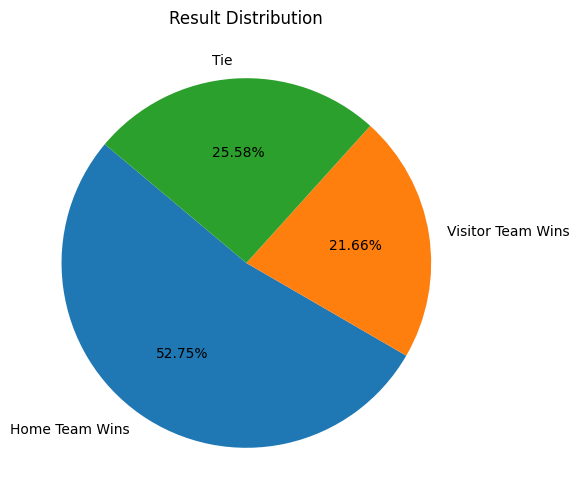

In [156]:
import matplotlib.pyplot as plt

valores = [num_victories_local, num_defeats_local, num_draws]

etiquetas = ['Home Team Wins', 'Visitor Team Wins', 'Tie']

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%.2f%%', startangle=140)
plt.title("Result Distribution")

plt.show()

Exercise 2:

In [157]:
cursor.close()
sqliteConnection.close()